In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

In [5]:
pathlistings = '/content/gdrive/My Drive/BT4222 project/afterfeatureengineering2.csv'
df = pd.read_csv(pathlistings)
len(df)

99990

In [0]:
df.head()

,Central Park,Times Square,Grand Central Terminal,Theater District,Rockefeller Centre,Bryant Park,Prospect Park,South Street Seaport,High Line,Coney Island,National 911 Memorial,Metropolitan Museum of Art,Rockaway Beach,American Museum of Natural History,Statue of Liberty,Empire State Building,National 911 Museum,Museum of Modern Art,One World Trade Centre,within_1km,within_2km,accommodates,availability_365,bathrooms,bedrooms,beds,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,host_verifications,instant_bookable,is_business_travel_ready,maximum_nights,minimum_nights,number_of_reviews,price,...,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,6.290352,3.370646,2.896662,3.582550,3.527032,3.021299,7.306778,2.981886,3.080815,17.006171,3.228241,6.027293,21.185678,5.987302,6.372342,2.411184,3.161735,3.866688,3.149798,0.0,0.0,7.0,144.0,2.0,3.0,4.0,100.0,0.0,1.0,1,0,0,1.0,6,1,0,1125.0,2.0,2.0,475.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,11.087517,9.054114,8.307356,9.212780,8.962088,8.680486,3.946629,6.167145,9.104113,12.857144,7.207090,10.741018,15.173004,11.116263,9.112143,8.196074,7.115943,9.214852,7.271771,0.0,0.0,2.0,0.0,1.0,1.0,1.0,40.0,20.0,1.0,1,1,0,2.0,5,0,0,21.0,1.0,1.0,60.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,9.598588,6.847807,6.309758,7.055763,6.962864,6.493505,3.839729,2.737979,6.335120,13.585547,3.786344,9.301395,18.329670,9.387890,5.856323,5.890632,3.696358,7.287277,3.859221,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0,0,2.0,7,1,0,7.0,3.0,0.0,80.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,9.359295,6.105582,5.976040,6.343340,6.485131,5.853955,5.878091,0.591749,4.774123,14.847273,0.766183,9.151463,21.346301,8.891733,3.027238,5.222351,0.718512,6.842493,0.911551,3.0,3.0,5.0,16.0,1.0,1.0,3.0,0.0,10.0,2.0,1,0,0,1.0,7,0,0,1125.0,3.0,18.0,225.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,13.629902,10.650841,10.248802,10.877186,10.871553,10.327161,1.779097,5.072663,9.698244,9.780382,5.889518,13.352669,17.341317,13.337440,5.651166,9.690278,5.843060,11.215776,6.036516,0.0,1.0,6.0,0.0,2.0,3.0,3.0,100.0,0.0,1.0,1,0,0,1.0,8,1,0,31.0,3.0,6.0,280.0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
df.columns[:68]

Index(['Central Park', 'Times Square', 'Grand Central Terminal',
       'Theater District', 'Rockefeller Centre', 'Bryant Park',
       'Prospect Park', 'South Street Seaport', 'High Line', 'Coney Island',
       'National 911 Memorial', 'Metropolitan Museum of Art', 'Rockaway Beach',
       'American Museum of Natural History', 'Statue of Liberty',
       'Empire State Building', 'National 911 Museum', 'Museum of Modern Art',
       'One World Trade Centre', 'within_1km', 'within_2km', 'accommodates',
       'availability_365', 'bathrooms', 'bedrooms', 'beds', 'cleaning_fee',
       'extra_people', 'guests_included', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications', 'instant_bookable',
       'is_business_travel_ready', 'maximum_nights', 'minimum_nights',
       'number_of_reviews', 'price', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'review_scores_rating', 'noofholid

In [0]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

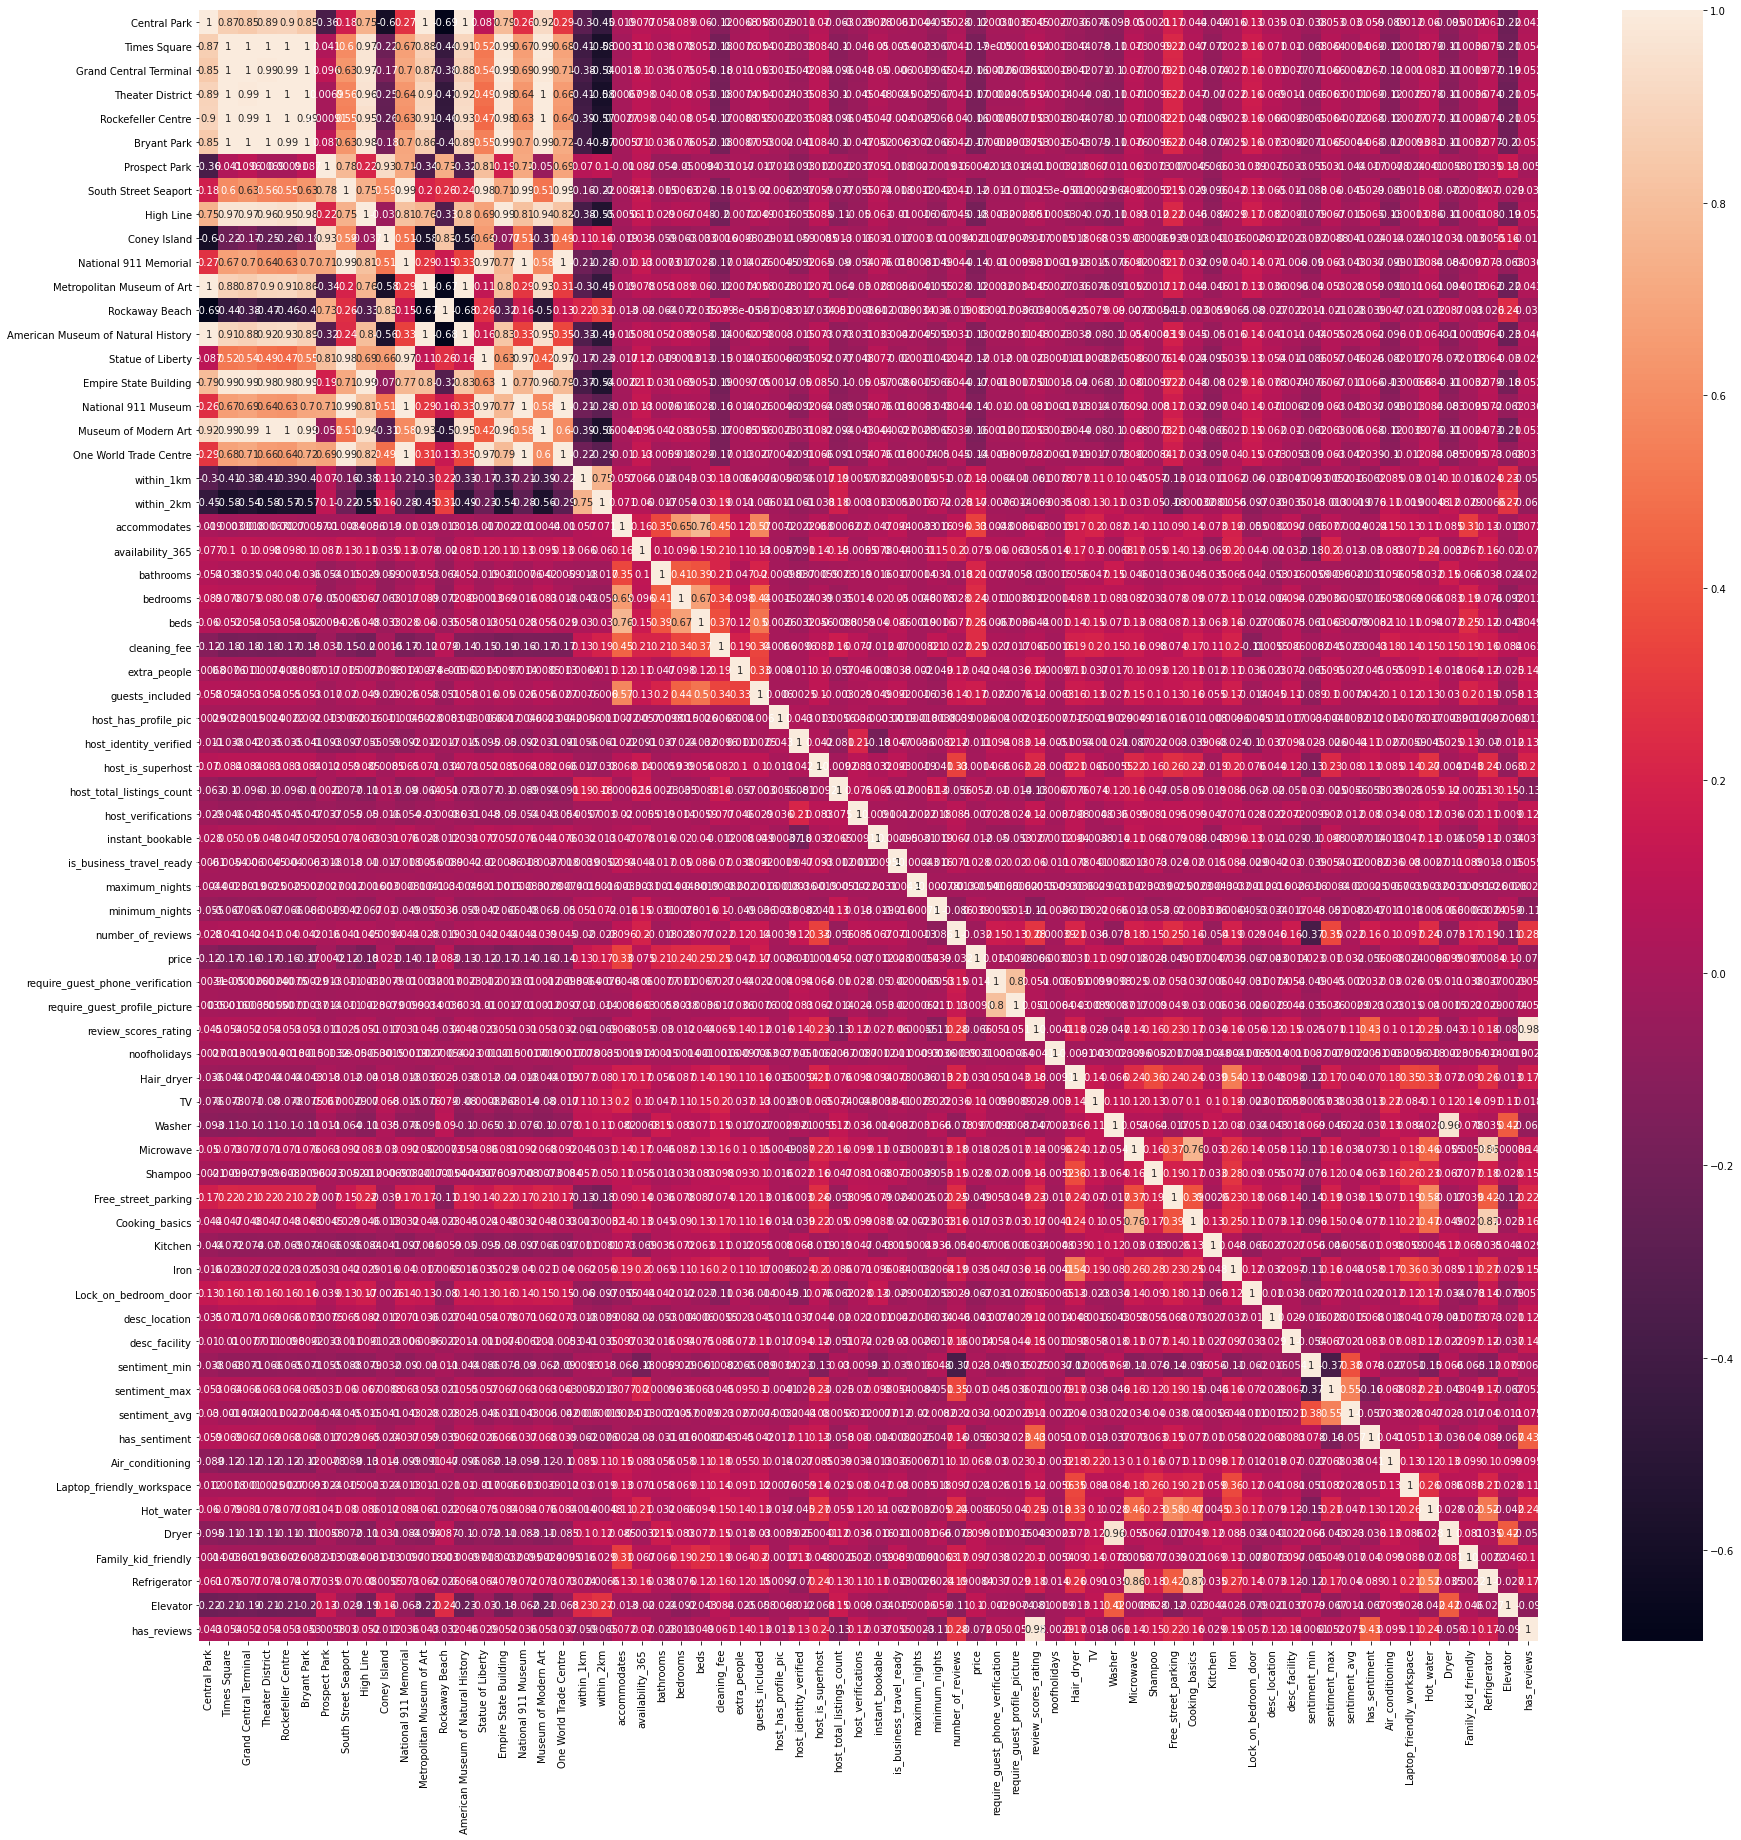

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
plot = plt.figure(figsize = (30,30))
corr = df[df.columns[:68]].corr()
sns.heatmap(corr, annot = True)

In [0]:
df[df.Hair_dryer != 0]

,Central Park,Times Square,Grand Central Terminal,Theater District,Rockefeller Centre,Bryant Park,Prospect Park,South Street Seaport,High Line,Coney Island,National 911 Memorial,Metropolitan Museum of Art,Rockaway Beach,American Museum of Natural History,Statue of Liberty,Empire State Building,National 911 Museum,Museum of Modern Art,One World Trade Centre,within_1km,within_2km,accommodates,availability_365,bathrooms,bedrooms,beds,cleaning_fee,extra_people,guests_included,host_has_profile_pic,host_identity_verified,host_is_superhost,host_total_listings_count,host_verifications,instant_bookable,is_business_travel_ready,maximum_nights,minimum_nights,number_of_reviews,price,...,property_type_Bungalow,property_type_Bus,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Earth house,property_type_Farm stay,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Houseboat,property_type_Hut,property_type_In-law,property_type_Island,property_type_Lighthouse,property_type_Loft,property_type_Nature lodge,property_type_Other,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room


In [6]:
X = df.drop(columns=['price'])
y = df.price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)

(74992, 324)
(24998, 324)


In [7]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print("training SMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred))
print("testing SMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred))

training SMSE:  233.24033460930758
training R2:  0.19526118436036632
testing SMSE:  203.27925731945797
testing R2:  0.22704869757271062


In [0]:
np.std(y_test)

231.2155288354705

In [0]:
df2 = pd.DataFrame({'feature':X.columns, 'importance':clf.coef_}).sort_values(by='importance', ascending=False).reset_index(drop=True)

In [12]:
df2[df2.feature == 'bedrooms']

,feature,importance
53,bedrooms,23.57183


In [13]:
df2[df2.feature == 'bathrooms']

,feature,importance
30,bathrooms,63.159449


In [0]:
from sklearn.model_selection import GridSearchCV
grid_values = {'fit_intercept': [True, False],
               'normalize':[True, False]}
grid_clf = GridSearchCV(clf, param_grid = grid_values,scoring ='neg_root_mean_squared_error')
grid_clf.fit(X_train, y_train)
mean_squared_error(y_test, grid_clf.predict(X_test), squared=False)

203.26297100381376

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [0]:
clf2 = LinearRegression()
clf2.fit(X_train_scaled,y_train)

y_train_pred = clf2.predict(X_train_scaled)
y_test_pred = clf2.predict(X_test_scaled)
print("training SMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred))
print("testing SMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred))

training SMSE:  233.54493207344174
training R2:  0.1931579335684538
testing SMSE:  275776574672.83514
testing R2:  -1.4225932665248832e+18


In [0]:
X_train_poly2 = np.hstack((X_train, X_train**2))
X_test_poly2 = np.hstack((X_test, X_test**2))
print(X_train_poly2.shape)
print(X_test_poly2.shape)

(74992, 626)
(24998, 626)


In [0]:
clf3 = LinearRegression()
clf3.fit(X_train_poly2,y_train)

y_train_pred = clf3.predict(X_train_poly2)
y_test_pred = clf3.predict(X_test_poly2)
print("training SMSE: ", mean_squared_error(y_train, y_train_pred, squared=False))
print("training R2: ", r2_score(y_train, y_train_pred))
print("testing SMSE: ", mean_squared_error(y_test, y_test_pred, squared=False))
print("testing R2: ", r2_score(y_test, y_test_pred))

training SMSE:  238.32670998820876
training R2:  0.15977988684732602
testing SMSE:  205.09769557286808
testing R2:  0.21315794467478777
